# 01 Importando librerias y obtención de información del sitio web

Importamos la libreria requests

In [1]:
import requests

Guardamos la URL del sitio web para trabajar en el proyecto.

In [2]:
url = 'https://www.pagina12.com.ar'

utilizamos el método get de la libreria requests y lo guardamos en una variable

In [3]:
p12 = requests.get(url)

Comprobamos el estado de la peticion. 200 indica que todo salio bien, si se muestra otro código se debe de buscar el código para solucionarlo.

In [4]:
p12.status_code

200

Visualizamos el contenido de la página web, se muestra en texto plano.

In [5]:
print(p12.text)

<!DOCTYPE html><html class="no-js " lang="es"><head><meta charset="utf-8"><title>Página | 12: La otra mirada sobre Argentina y el mundo</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><link rel="canonical" href="https://www.pagina12.com.ar"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página|12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Información sobre Argentina y el mundo. Noticias en fotos y videos de los principales hechos y acontecimientos del país. Análisis, opinión y entrevistas."><meta property="fb:pages" 

Si se requiere vizualizar el heder de la página se utiliza <headers>, no siempre es necesario conocer el contenido de header.

In [6]:
p12.headers

{'Date': 'Thu, 29 Jun 2023 20:03:50 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'vary': 'Accept-Encoding', 'x-dns-prefetch-control': 'off', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-download-options': 'noopen', 'x-content-type-options': 'nosniff', 'x-xss-protection': '1; mode=block', 'x-etag': 'W/"757b7-BaA/SjR86kGUXJXEYfGAOD4c32U"', 'x-backend': 'frontend', 'x-type': 'Dynamic URI', 'x-backend-ttl': '120.000', 'Age': '80', 'grace': '86400.000 none', 'ttl': '39.316', 'x-instance': 'cache-front-prod-varnish-779f5667bd-nddvf', 'x-restarts': '0', 'x-cache': 'hit cached', 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '7df0c66e1b5f0cbf-LAX', 'Content-Encoding': 'gzip'}

Para conocer la cabecera del request

In [7]:
p12.request.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

Para conocer el método que utilizamos para la consulta.

In [8]:
p12.request.method

'GET'

Consultar la url a la que estamos apuntando para obtener la información.

In [9]:
p12.request.url

'https://www.pagina12.com.ar/'

# 02 Parseando HTML con BeatifulSoup

Importamos la libreria BeatifulSoup

In [10]:
from bs4 import BeautifulSoup

Utilizamos BS para el parse del texto y convertirlo a lxml

In [11]:
s = BeautifulSoup(p12.text, 'html.parser')

Comprobamos el tipo de dato guardado

In [12]:
type(s)

bs4.BeautifulSoup

Damos formato al objeto s 

In [13]:
print(s.prettify())

<!DOCTYPE html>
<html class="no-js" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página | 12: La otra mirada sobre Argentina y el mundo
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <link href="https://www.pagina12.com.ar" rel="canonical"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página|12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <meta content="Información sobre Argentina y el mundo. Noticias en fotos y videos de los principales hechos y acontecimientos del país. Análisis, opinión y entrevistas." name="description" property="de

Seleccionar partes especificas del archivo, empleando el método <find>, seguido de el texto a buscar, se utilizan atributos para ser más especificos, los atributos son en formato de diccionario

In [14]:
secciones = s.find('ul', attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')
secciones


[<li class="p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class="p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="no-separator-on-1040 p12-separator--right--blue"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Espectáculos</a></li>,
 <li class="hide-on-1040 p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="hide-on-1040 p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="hide-on-1040"><a href="https://www.pagina12.com.ar/secciones/ciencia">Ciencia</a></li>]

# 03 Extrayendo información

utilizamos el primer item del objeto secciones

In [15]:
seccion = secciones[0]
seccion

<li class="p12-separator--right--blue"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>

Obtenemos el elemento html <a>

In [16]:
seccion.find('a')

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

Ya que <find> obtiene el primerl elemeto, se puede reescribir al siguiente código, obteniendo le mismo resultado.

In [17]:
seccion.a

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

Obtener el texto de el elemento html <a>

In [18]:
seccion.a.get_text()

'El país'

Obtener el enlace del elemento HTML <a>

In [19]:
seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

Obtener todos los links

In [20]:
links_secciones = [seccion.a.get('href') for seccion in secciones]
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/ciencia']

Peticion al primer link de links_secciones

In [21]:
sec = requests.get(links_secciones[0])
sec.status_code

200

Obtener el contenido del link con BeatifulSoup, prettify.

In [22]:
s_seccion = BeautifulSoup(sec.text, 'html.parser')
print(s_seccion.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html amp="" lang="es"><head><meta charset="utf-8"/><title>El país | Página|12</title><!-- DUST PATH: /usr/src/app/src/widgets/fc_jsonLD.dust/ --><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página|12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><script type="application/ld+json">{"@context": "http://schema.org","@type": "NewsArticle","mainEntityOfPage": {"@type": "WebPage","@id": "https://www.pagina12.com.ar/secciones/el-pais"},"headline": "El país | Página|12","isAccessibleForFree": "False","image": {"@type": "ImageObject","url": "https://images.pagina12.com.ar/styles/focal_3

Obtener el contenido de las noticias de la seccion "El Pais"

In [23]:
featured_article = s_seccion.find('div', attrs={'article-item__content'})
featured_article

<div class="article-item__content"><!-- Title --><h2 class="title ff-31px-w800-ls-1"><a href="/563398-el-esposo-de-milagro-sala-se-descompenso-en-medio-del-allana">El esposo de Milagro Sala se descompensó en medio del allanamiento </a></h2><!-- Kicker --><p class="ff-20px-ls-07"><a href="/563398-el-esposo-de-milagro-sala-se-descompenso-en-medio-del-allana">La policía de Jujuy demoró el traslado al hospital</a></p></div>

Obtener el link del articulo

In [24]:
featured_article.a.get('href')

'/563398-el-esposo-de-milagro-sala-se-descompenso-en-medio-del-allana'

Obtener todos los links de los articulos

In [25]:
article_list = s_seccion.find('div', attrs={'class':'article-item__content'})
article_list

<div class="article-item__content"><!-- Title --><h2 class="title ff-31px-w800-ls-1"><a href="/563398-el-esposo-de-milagro-sala-se-descompenso-en-medio-del-allana">El esposo de Milagro Sala se descompensó en medio del allanamiento </a></h2><!-- Kicker --><p class="ff-20px-ls-07"><a href="/563398-el-esposo-de-milagro-sala-se-descompenso-en-medio-del-allana">La policía de Jujuy demoró el traslado al hospital</a></p></div>

Función que recibe un objeto BeatifulSoup de una pagina de una sección y devuelve una lista de URL a las notas de la seccion.

In [26]:
def obtener_notas(soup):
    lista_notas=[]
       
    # Listado de articulos
    article_list = soup.find('div', attrs={'class':'main-content'})
    for article in article_list.find_all('div', attrs={'class':'article-item__content'}):
        if article.a:
            lista_notas.append(article.a.get('href'))
    return lista_notas
    

In [27]:
lista_notas = obtener_notas(s_seccion)
lista_notas

['/563398-el-esposo-de-milagro-sala-se-descompenso-en-medio-del-allana',
 '/563364-rodriguez-larreta-y-un-insolito-furcio-en-campana-vamos-a-ir',
 '/563335-el-abrazo-de-sergio-massa-y-daniel-scioli',
 '/563313-como-por-que-y-para-que-hay-que-votar-a-sergio-massa',
 '/563298-grindetti-minimiza-la-interna-larreta-bullrich-y-avisa-despu',
 '/563297-la-policia-de-jujuy-allano-la-casa-de-milagro-sala',
 '/563254-elecciones-argentina-2023-todos-los-candidatos-y-lista-encue',
 '/563142-arde-la-interna-del-pro-del-modelo-que-fracaso-a-ventajero-y',
 '/563145-juan-grabois-comenzo-la-campana-con-fuertes-criticas-a-sergi',
 '/563159-tras-el-fallo-de-la-corte-contra-unac-san-juan-elige-goberna',
 '/563177-los-papeles-que-permiteron-reconstruir-el-asesinato-de-chupe']

# 04 Manejo de errores

Comprobar el estado de la solicitud get

In [28]:
r = requests.get(url)
print(r.status_code)

200


In [29]:
# creamos una url erronea para pruebas
url_error = url.replace('2','3')
url_error

'https://www.pagina13.com.ar'

Comprobacion si la consulta salio bien (200)

In [30]:
try:
    requests.get(url)
    print(obtener_notas(s_seccion))
except Exception as e:
    print('Error en la request')
    print(e)
    print('\n')

['/563398-el-esposo-de-milagro-sala-se-descompenso-en-medio-del-allana', '/563364-rodriguez-larreta-y-un-insolito-furcio-en-campana-vamos-a-ir', '/563335-el-abrazo-de-sergio-massa-y-daniel-scioli', '/563313-como-por-que-y-para-que-hay-que-votar-a-sergio-massa', '/563298-grindetti-minimiza-la-interna-larreta-bullrich-y-avisa-despu', '/563297-la-policia-de-jujuy-allano-la-casa-de-milagro-sala', '/563254-elecciones-argentina-2023-todos-los-candidatos-y-lista-encue', '/563142-arde-la-interna-del-pro-del-modelo-que-fracaso-a-ventajero-y', '/563145-juan-grabois-comenzo-la-campana-con-fuertes-criticas-a-sergi', '/563159-tras-el-fallo-de-la-corte-contra-unac-san-juan-elige-goberna', '/563177-los-papeles-que-permiteron-reconstruir-el-asesinato-de-chupe']


# 5 Descargando contenido

Seleccionamos el primer elemento de la lista creada anteriormente

In [31]:
# se realizó la concatenación de la url con la url_nota para obtener el link completo a la nota
url_nota = lista_notas[0]
url_nota = url + url_nota
url_nota

'https://www.pagina12.com.ar/563398-el-esposo-de-milagro-sala-se-descompenso-en-medio-del-allana'

Creamos un try except para capturar los posibles errores

In [32]:
try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'html.parser')
        
        # Extraemos el título
        titulo = s_nota.find('div', attrs={'class' : 'col 2-col'}).h1
        print(f"Título: {titulo.text}")
        
        # Extraer la fecha
        fecha = s_nota.find('time').get('datetime')
        print(f"Fecha de publicación: {fecha}")
        
        # Extraer el autor
        author = s_nota.find('div',attrs={'class':'author-inner'}).get_text()
        print(f"Autor: {author}")
        
        # Extraer nota
        nota = s_nota.find('div', attrs={'class' : 'article-main-content article-text'})
        print(nota.text)
            

except Exception as e:
    print(f'Error:{e} \n')
    
    

Título: El esposo de Milagro Sala se descompensó en medio del allanamiento 
Fecha de publicación: 2023-06-29T16:59:33-03:00
Autor: 
El periodista Raúl Noro, marido de Milagro Sala, se descompensó este jueves en su casa del barrio de Cuyaya, San Salvador de Jujuy, mientras la Policía jujeña que responde al gobierno de Gerardo Morales realizaba un allanamiento en la vivienda, donde la dirigente de la Tupac Amaru cumple prisión domiciliaria. Según denunciaron fuentes del entorno de Sala, los médicos pudieron ingresar al domicilio para atender a Noro pero los uniformados, en un nuevo acto de hostigamiento hacia la referenta social, les impidieron retirarse."El esposo de Milagro, que se encuentra en estado grave de salud, se descompuso en el allanamiento. Milagro llamó a una ambulancia. Los médicos pudieron ingresar al domicilio pero el Poder Judicial y la Policía ahora les impiden salir del mismo", informaron fuentes cercanas a Sala.Finalmente, según confirmó a la AM750 Coco Garfagnini, di

Código para extraer y descargar la imagen de la nota

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2023-06/741988-whatsapp-20image-202023-06-29-20at-2015-51-15.jpeg?h=49b9f193&itok=hLZXT2g4


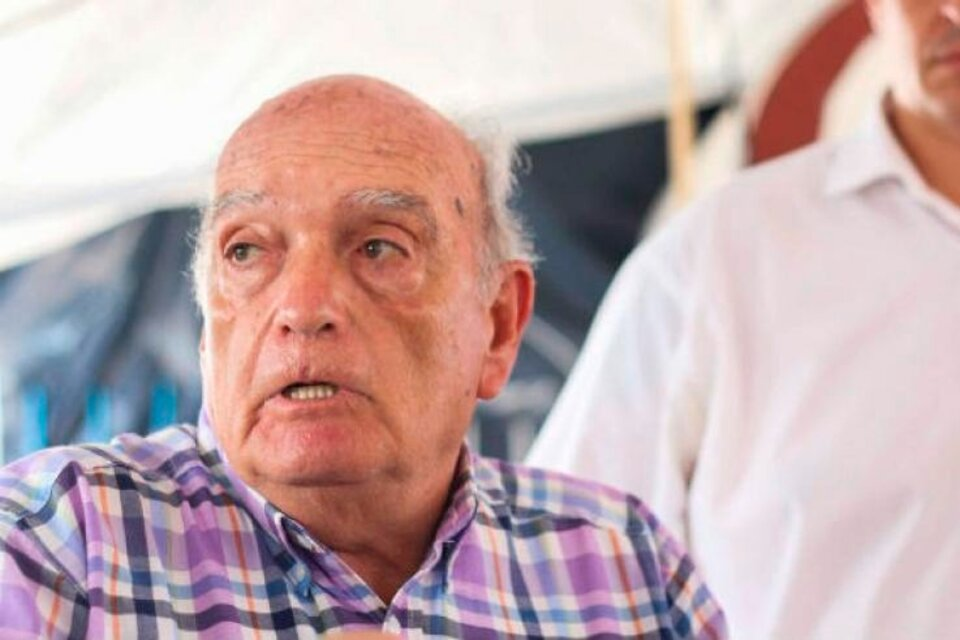

In [33]:
  # Extraer imagenes
media = s_nota.find('figure', attrs={'class' : 'object-fit-block--contain intrinsic-container intrinsic-container-3x2'}).img.get('src')
print(media)
img_req = requests.get(media)
from IPython.display import Image
Image(img_req.content)